# ▒ 다양한 분류 모형 평가 측도 ▒

## 0. 환경설정

In [ ]:
import os
import numpy as np
import pandas as pd
import time
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 1. 데이터 준비

### 데이터 설명 (Titanic dataset)

- 타이타닉호에 탔던 891명 승객들의 정보
- 승객들의 정보로 사망 여부를 예측하는 모형을 구축하자.
- Survived: 사망 여부 (0: 사망, 1: 생존)
- Pclass: 1=1등석, 2=2등석, 3=3등석
- Sex: male=남성, female=여성
- Age: 나이
- SibSp: 타이타닉 호에 동승한 자매/배우자의 수
- Parch: 타이타닉 호에 동승한 부모/자식의 수
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 방 호수
- Embarked: 탑승지, C=셰르부르, Q=퀸즈타운, S=사우샘프턴

### 데이터 호출

In [ ]:
data_file = "/content/gdrive/MyDrive/data/titanic.txt"
titanic = pd.read_csv(data_file)
print(titanic.shape)
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 전처리

- 성별, 나이, 좌석 클래스로 사망 여부를 예측하자. 
- 성별에서 남성은 0, 여성은 1로 변환
- 나이에서 결측치는 평균값으로 대체
- 좌석 클래스에 대한 가변수 생성 (1,2,3등급이므로 2개의 가변수면 충분)

In [ ]:
titanic['Sex'] = titanic['Sex'].map({'female':1,'male':0})
titanic['Age'].fillna(value=titanic['Age'].mean(), inplace=True)
titanic['FirstClass'] = titanic['Pclass'].apply(lambda x: 1 if x == 1 else 0)
titanic['SecondClass'] = titanic['Pclass'].apply(lambda x: 1 if x == 2 else 0)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


- 종속변수와 독립변수 구분하기
- 학습 데이터, 평가 데이터, 시험 데이터 나누기

- train_x_titanic_f, train_y_titanic_f : Training input & output data
- test_x_titanic, test_y_titanic : Test input & output data

- train_x_titanic, train_y_titanic_y, valid_x_titanic, valid_y_titanic : optimal tuning parameter를 찾기 위해 training data를 split하였음. 

In [ ]:
x_titanic = titanic[['Sex', 'Age', 'FirstClass', 'SecondClass']]
y_titanic = titanic['Survived']

In [ ]:
train_x_titanic, test_x_titanic, train_y_titanic, test_y_titanic = train_test_split(x_titanic, y_titanic, test_size=0.3, random_state=123)

print(train_x_titanic.shape)
print(test_x_titanic.shape)

(623, 4)
(268, 4)


## 1. 로지스틱 모형 적합하기
### 학습 데이터를 이용해서 로지스틱 모형을 적합하자.
- 학습 데이터 : train_x_titanic, train_y_titanic

In [ ]:
logistic = LogisticRegression(penalty='none')
logistic.fit(train_x_titanic, train_y_titanic)

LogisticRegression(penalty='none')

## 2. 적합된 로지스틱 모형 성능 확인하기
### 예측 정확도와 오차행렬
- cut-off value: 0.5 사용

In [ ]:
print(logistic.score(test_x_titanic, test_y_titanic)) 
test_y_prediction = logistic.predict(test_x_titanic)
sklearn.metrics.confusion_matrix(test_y_titanic, test_y_prediction)

0.7835820895522388


array([[136,  34],
       [ 24,  74]])

- Cut-off value를 0.3으로 사용해보자.

In [ ]:
test_prob = logistic.predict_proba(test_x_titanic)[:,1]
cut_off = 0.3
test_y_pred = np.array((test_prob>cut_off)).astype(dtype='int')

print((test_y_pred==test_y_titanic).mean())
sklearn.metrics.confusion_matrix(test_y_titanic, test_y_pred)

0.7761194029850746


array([[124,  46],
       [ 14,  84]])

### 민감도 (재현율), 특이도, 정밀도 계산

In [ ]:
## 정밀도
print(sklearn.metrics.precision_score(test_y_titanic, test_y_pred))
## 특이도
print(sklearn.metrics.recall_score(test_y_titanic, test_y_pred, pos_label=0))
## 정밀도
print(sklearn.metrics.recall_score(test_y_titanic, test_y_pred))

0.6461538461538462
0.7294117647058823
0.8571428571428571


### F1 score

In [ ]:
print(sklearn.metrics.f1_score(test_y_titanic, test_y_pred))

0.736842105263158


### ROC curve and AU-ROC

0.85531212484994
0.85531212484994


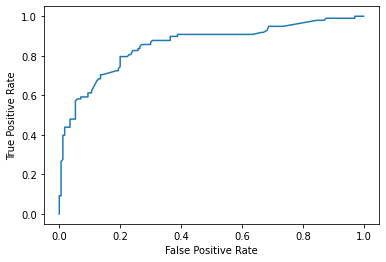

In [ ]:
fpr, tpr, _ = sklearn.metrics.roc_curve(test_y_titanic, test_prob)
roc_display = sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(sklearn.metrics.roc_auc_score(test_y_titanic, test_prob))
print(sklearn.metrics.auc(fpr, tpr))

### PR curve, PR-AUC and AP

0.8084289174553778
0.8084397139695619


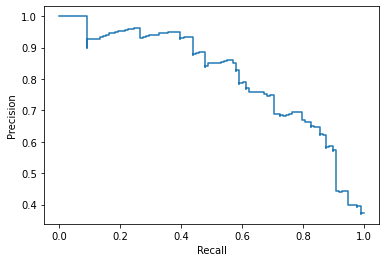

In [ ]:
precision, recall, _ = sklearn.metrics.precision_recall_curve(test_y_titanic, test_prob)
pr_curve_display = sklearn.metrics.PrecisionRecallDisplay(precision=precision, recall=recall).plot()
print(sklearn.metrics.auc(recall, precision))
print(sklearn.metrics.average_precision_score(test_y_titanic, test_prob))